# **Importing libraries**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.layers import Conv2D,InputLayer, Dropout, BatchNormalization, Flatten, Dense, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

# **Loading Dataset**

In [2]:
#As we are focusing now on predicting age from image we will call the dataset as df_age:

data = pd.read_csv('../input/age-gender-and-ethnicity-face-data-csv/age_gender.csv')
data.head(5)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [3]:
data.shape

(23705, 5)

In [4]:
data.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


# **Data Preprocessing**

In [5]:
data.isnull().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [6]:
data = data.drop('img_name', axis=1)

In [7]:
data.head(10)

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...
5,1,2,0,195 198 200 200 198 198 199 199 198 197 197 19...
6,1,2,0,208 216 217 219 222 223 222 221 220 220 221 22...
7,1,2,0,99 142 169 177 179 181 183 186 187 186 191 190...
8,1,2,0,127 127 133 140 143 148 152 157 160 165 172 17...
9,1,2,0,199 211 211 214 216 216 219 221 222 224 219 21...


In [8]:
data['pixels'].shape

(23705,)

In [9]:
data['age'].value_counts()

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
103       1
111       1
Name: age, Length: 104, dtype: int64

# **Discover and visualize the data to gain insights**

> **Distribution of Age**

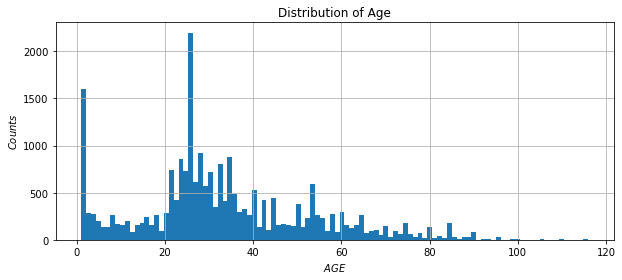

In [10]:
plt.figure(figsize=(10,4))
data['age'].hist(bins=data['age'].nunique())
plt.xlabel("$AGE$")
plt.ylabel("$Counts$")
plt.title("Distribution of Age")
plt.show()

In [11]:
print("Avg Age: " + str(data["age"].mean()))
print("Max Age: " + str(data["age"].max()))
print("Min Age: " + str(data["age"].min()))
print("Median Age: " + str(data["age"].median()))

Avg Age: 33.30090698164944
Max Age: 116
Min Age: 1
Median Age: 29.0


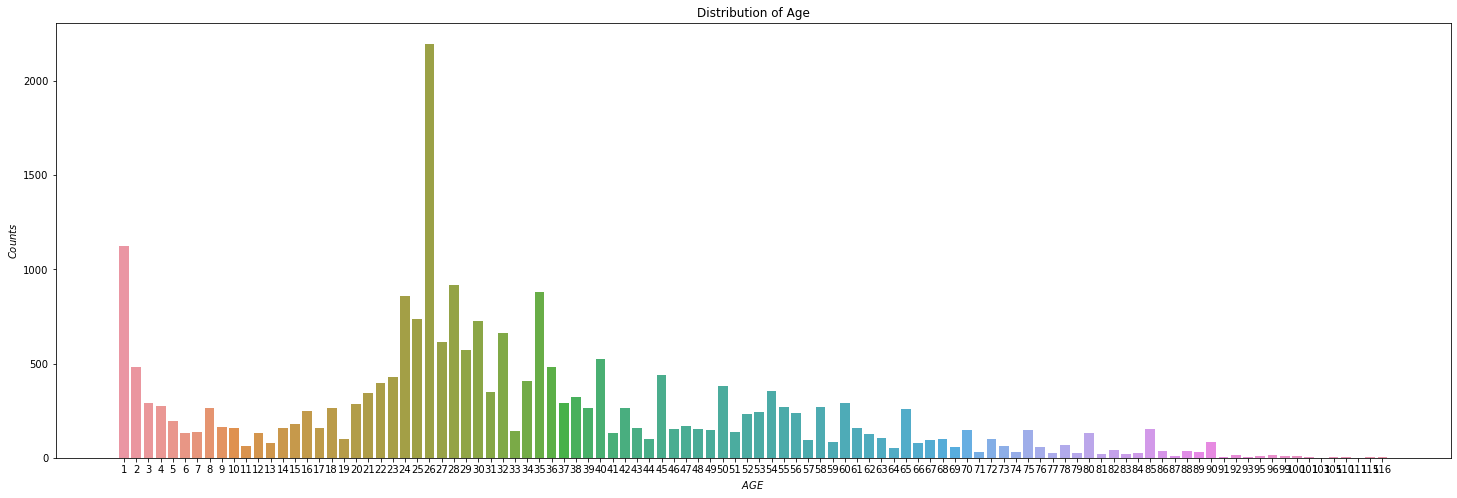

In [12]:
#Using seaborn
plt.figure(figsize=(25,8))
sns.barplot(x= list(data['age'].value_counts().index),y=list(data['age'].value_counts().values))
plt.plot(figsize=(10,20))
plt.xlabel("$AGE$")
plt.ylabel("$Counts$")
plt.title("Distribution of Age")
plt.show()

In [13]:
# To make this notebook's output identical at every run
np.random.seed(42)

data['pixels'] = data['pixels'].map(lambda x: np.array(x.split(' '), dtype=np.float32).reshape(48, 48))

In [14]:
data['pixels'].head()

0    [[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 13...
1    [[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...
2    [[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...
3    [[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 20...
4    [[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 21...
Name: pixels, dtype: object

In [15]:
## Normalizing pixels data
data['pixels'] = data['pixels'].apply(lambda x: x/255)

In [16]:
data['pixels'].head()

0    [[0.5058824, 0.5019608, 0.5019608, 0.49411765,...
1    [[0.6431373, 0.2901961, 0.43529412, 0.65882355...
2    [[0.2627451, 0.27450982, 0.2784314, 0.27450982...
3    [[0.75686276, 0.77254903, 0.7764706, 0.7843137...
4    [[0.7921569, 0.8039216, 0.81960785, 0.8235294,...
Name: pixels, dtype: object

In [17]:
X = np.array(data['pixels'].tolist())
X.shape

(23705, 48, 48)

In [18]:
## Converting pixels from 1D to 3D
X = X.reshape(X.shape[0],48,48,1)
X.shape

(23705, 48, 48, 1)

In [19]:
y_age = np.array(data['age'])
y_gender = np.array(data['gender'])
print('X',X.shape)
print('y_age',y_age.shape)
print('y_gender',y_gender.shape)


X (23705, 48, 48, 1)
y_age (23705,)
y_gender (23705,)


In [20]:
# X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(X, y_age, test_size=0.2, random_state=42)
# X_age_train, X_age_test, y_gender_train, y_gender_test = train_test_split(X, y_gender, test_size=0.2, random_state=42)

In [21]:
X_train, X_test, y_age_train, y_age_test, y_gender_train, y_gender_test = train_test_split(X,y_age, y_gender, test_size=0.2, random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_age_train.shape)
print(y_gender_train.shape)
print(y_age_test.shape)
print(y_gender_test.shape)

(18964, 48, 48, 1)
(4741, 48, 48, 1)
(18964,)
(18964,)
(4741,)
(4741,)


In [23]:
print("Value of y_training_data[0]: ",y_age_train[0])
print("Value of y_test_data[0]: ",y_age_test[0])
print("Value of y_training_data[0]: ",y_gender_train[0])
print("Value of y_test_data[0]: ",y_gender_test[0])

Value of y_training_data[0]:  63
Value of y_test_data[0]:  49
Value of y_training_data[0]:  1
Value of y_test_data[0]:  1


# **Training the models**

In [24]:
tf.keras.backend.clear_session()

AgeModel = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3),padding='same'),
    L.BatchNormalization(),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(128, (3, 3), activation='relu',padding='same'),
    L.Dropout(rate=0.3),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(256, (3, 3), activation='relu',padding='same'),
    L.MaxPooling2D((2, 2)),
    L.Dropout(rate=0.5),
    L.BatchNormalization(),
    L.Flatten(),
    L.Dense(512, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(256, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(1)
])


AgeModel.compile(optimizer='adam',
        loss='mean_squared_error',
        metrics=['accuracy'])


In [25]:
## Stop training when validation loss reach 0.2700
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<0.2700):
            print("\nReached 0.2700 val_loss so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()

In [26]:
AgeModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 256)       2

In [27]:
##Gender Model
GenderModel = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    L.BatchNormalization(),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(1, activation='sigmoid')
])

sgd = tf.keras.optimizers.SGD(learning_rate=0.007)

GenderModel.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])


# ## Stop training when validation loss reach 0.2700
# class myCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('val_loss')<0.2700):
#             print("\nReached 0.2700 val_loss so cancelling training!")
#             self.model.stop_training = True
        
# callback = myCallback()

GenderModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [28]:
Age_history = AgeModel.fit(X_train, y_age_train, epochs=5, validation_split=0.2, batch_size=64,callbacks=[tf.keras.callbacks.ReduceLROnPlateau()])

Epoch 1/5
238/238 [==============================] - 128s 538ms/step - loss: 261.3581 - accuracy: 0.0429 - val_loss: 1721.9738 - val_accuracy: 0.0459
Epoch 2/5
238/238 [==============================] - 122s 514ms/step - loss: 171.9685 - accuracy: 0.0370 - val_loss: 384.9301 - val_accuracy: 0.0459
Epoch 3/5
238/238 [==============================] - 121s 509ms/step - loss: 158.7951 - accuracy: 0.0431 - val_loss: 161.7088 - val_accuracy: 0.0459
Epoch 4/5
238/238 [==============================] - 120s 506ms/step - loss: 149.1565 - accuracy: 0.0414 - val_loss: 682.0613 - val_accuracy: 0.0459
Epoch 5/5
238/238 [==============================] - 126s 528ms/step - loss: 133.4978 - accuracy: 0.0444 - val_loss: 197.2661 - val_accuracy: 0.0459


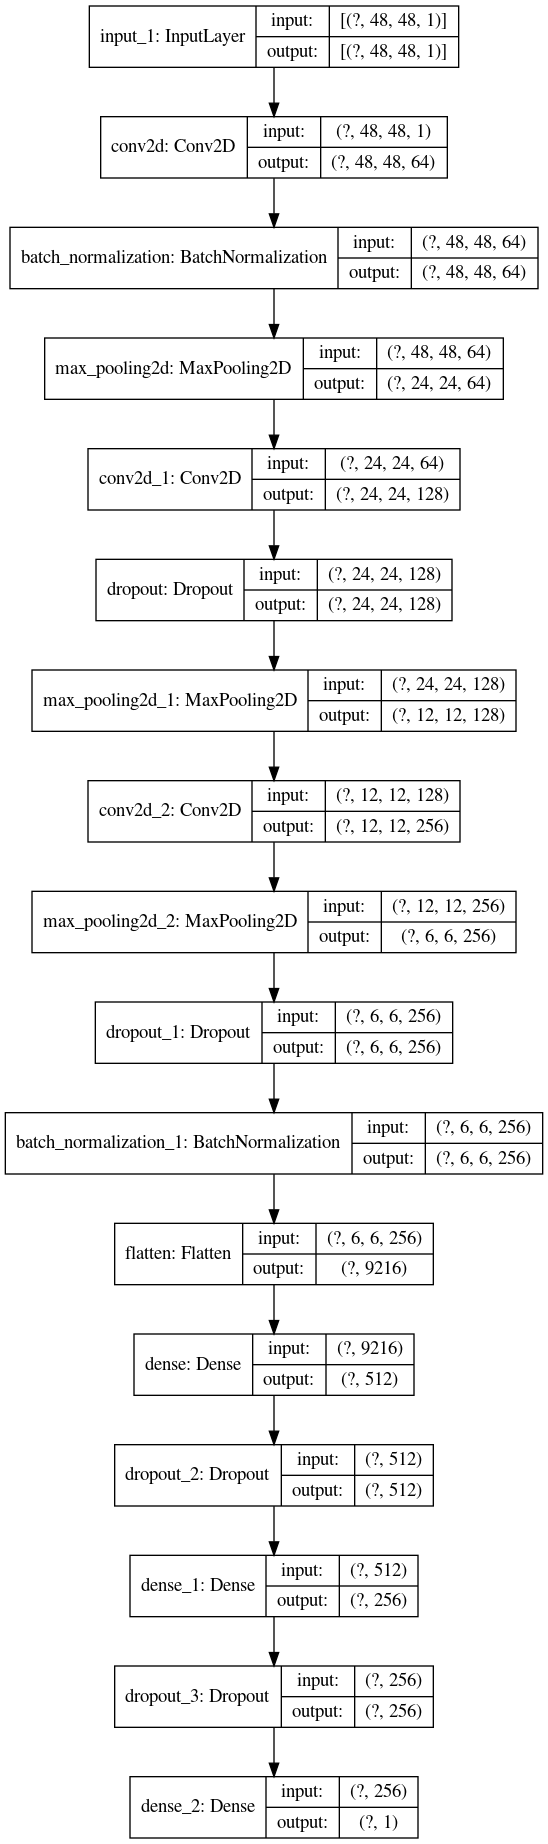

In [36]:
from keras.utils.vis_utils import plot_model
plot_model(AgeModel, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

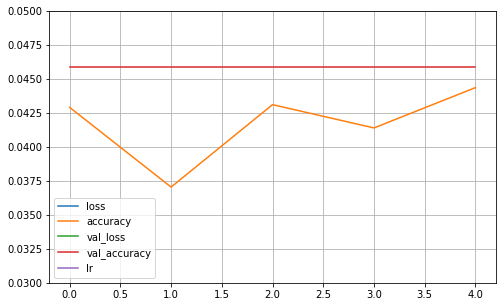

In [29]:
pd.DataFrame(Age_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.03, 0.05) # setting limits for y-axis
plt.show()

In [30]:
import plotly.express as px
fig = px.line(
    Age_history.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

In [31]:
Gender_history = GenderModel.fit(
    X_train, y_gender_train, epochs=14, validation_split=0.1, batch_size=64, callbacks=[callback]
)

Epoch 1/14
267/267 [==============================] - 29s 108ms/step - loss: 0.5027 - accuracy: 0.7588 - val_loss: 0.5713 - val_accuracy: 0.8018
Epoch 2/14
267/267 [==============================] - 28s 106ms/step - loss: 0.3877 - accuracy: 0.8291 - val_loss: 0.3923 - val_accuracy: 0.8329
Epoch 3/14
267/267 [==============================] - 29s 109ms/step - loss: 0.3460 - accuracy: 0.8458 - val_loss: 0.3335 - val_accuracy: 0.8498
Epoch 4/14
267/267 [==============================] - 28s 107ms/step - loss: 0.3247 - accuracy: 0.8579 - val_loss: 0.3184 - val_accuracy: 0.8661
Epoch 5/14
267/267 [==============================] - 29s 108ms/step - loss: 0.3086 - accuracy: 0.8644 - val_loss: 0.2894 - val_accuracy: 0.8703
Epoch 6/14
267/267 [==============================] - 28s 106ms/step - loss: 0.2969 - accuracy: 0.8702 - val_loss: 0.2729 - val_accuracy: 0.8772
Epoch 7/14
267/267 [==============================] - ETA: 0s - loss: 0.2837 - accuracy: 0.8791
Reached 0.2700 val_loss so cancell

In [32]:

fig = px.line(
    Gender_history.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

# **Model evaluation on test set**

In [33]:
##Age
mean_squared_error, mae = AgeModel.evaluate(X_test,y_age_test,verbose=0)
print('mean_squared_error: {}'.format(mean_squared_error))
print('mae: {}'.format(mae))

mean_squared_error: 197.11282348632812
mae: 0.04429445415735245


In [34]:
##Gender y_gender_train, 
loss, acc = GenderModel.evaluate(X_test,y_gender_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.2808454930782318
Test Accuracy: 0.8757646083831787


In [37]:
# Make predictions 
y_age_pred = AgeModel.predict(X_test)
y_gender_pred = GenderModel.predict(X_test)

In [38]:
print(y_age_pred)
print(y_gender_pred)

[[42.365086]
 [50.95505 ]
 [14.946557]
 ...
 [14.361922]
 [67.72001 ]
 [49.557983]]
[[0.94796985]
 [0.0130057 ]
 [0.55491287]
 ...
 [0.72313654]
 [0.06424221]
 [0.05830112]]


In [39]:
def mean_absolute_percentage_error(y_age_test,y_age_pred): 
    return np.mean(np.abs((y_age_test-y_age_pred) / y_age_test)) * 100
mean_absolute_percentage_error(y_age_test,y_age_pred)

323.36388042639356

In [48]:
def plot(X,y_age,y_gender):
    if y_gender<=0.5:
        plt.title('Male and Age is ' +str(y_age))
        
    else:
        plt.title('Female and Age is ' +str(y_age))
    plt.imshow(X.reshape(48,48))
    plt.show()

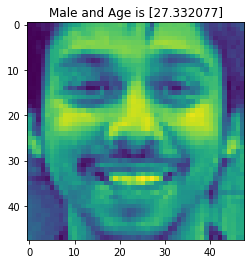

In [50]:
n=3
plot(X_test[n],y_age_pred[n],y_gender_pred[n])

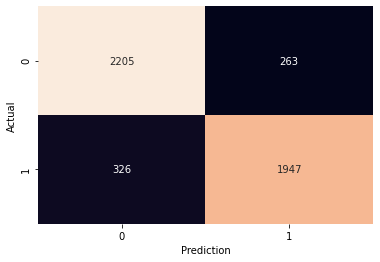

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Actual = np.round(y_gender_test)
Predicted = np.round(y_gender_pred)
sns.heatmap(confusion_matrix(Actual,Predicted),annot=True,cbar=False,fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Actual");

In [60]:
print(classification_report(Actual,Predicted))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2468
           1       0.88      0.86      0.87      2273

    accuracy                           0.88      4741
   macro avg       0.88      0.88      0.88      4741
weighted avg       0.88      0.88      0.88      4741

